<a id='task4'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 4.</b>

Use features calculated for each modality in task 3. Choose base classifier for each modality from scikit-learn. Train classifiers for each modality feature presentations separately and combine the outputs in decision level. Evaluate and compare the result on testing dataset. Do the subtasks given as
<br>
<br>
<p> <b>4.1</b> Use base classifiers of support vector machine (SVM) with RBF-kernel and AdaBoost classifier (with random_state=0).
Normalize data between 0-1 using the training dataset. Train the base classifiers by tuning the model parameters (<i>C</i> parameter and RBF-kernel <i>gamma</i> in SVM as well as <i>n_estimators</i> and <i>learning_rate</i> in Adaboost) using 10-fold cross-validation on training dataset to find optimal set of parameters (hint: use GridSearchCV from scikit-learn). For grid search use the following values $C = [0.1, 1.0, 10.0, 100.0]$, $gamma=[0.1, 0.25, 0.5, 0.75, 1.0, 2.0]$, $n\_estimators = [50, 100, 500, 1000]$, and $learning\_rate = [0.1, 0.25, 0.5, 0.75,1.0]$. Choose the best parameters and train the classifiers for each modality on whole training dataset. Is there a possibility that classifiers will overfit to training data using this parameter selection strategy? If so, why? </p>
<br>
<p> <b>4.2</b> Predict probabilistic outputs of each trained classifier for both modalities using the test set. </p>
<br>
<p> <b>4.3</b> Combine the probabilistic outputs of different modalities by fixed classification rules: max, min, prod, and sum. Evaluate, compare, and analyse the final combined results using confusion matrices and F1 scores. Show results for each base classifier combinations (i.e., $SVM_{acc}+SVM_{depth}$, $AdaBoost_{acc}+AdaBoost_{depth}$, $SVM_{acc}+AdaBoost_{depth}$, $AdaBoost_{acc}+SVM_{depth}$)</p>
<br>
Document your work, evaluate the results, and analyse the outcomes in each subtasks 4.1-4.3.

</div>

Run task **three** first to get training and testing features (from Task 3.3, notebook slovo_three)
If you have run task one yourself before you can skip first cell bellow

In [ ]:
%%capture
%run ./slovo_one.ipynb

In [19]:
#Get the training data form the notebook slovo_three (Task 3.3):
%store -r train_records_merged
train_records_merged = train_records_merged
%store -r test_records_merged
test_records_merged = test_records_merged

In [8]:
import pandas as pd
import numpy as np
import time
from copy import deepcopy
import importlib, utilities.fun_four, utilities.fun_one
importlib.reload(utilities.fun_four)
importlib.reload(utilities.fun_one)
from utilities.fun_four import ArrayNormalizer, GridClassifier, svm_classify, ada_classify, combine_probabilities, combine_visualize
from utilities.fun_one import visualize

## 4.1 Data preparation and svm and adaBoost classifiers training

#### Convert data from data frames into the numpy arrays

In [9]:
# Convert data
start_time = time.time()
# Accelerometer data
act_train = np.concatenate(train_records_merged.df_y.values)
act_test = np.concatenate(test_records_merged.df_y.values)
act_train_labels = np.array(train_records_merged.exercise_id.apply(lambda x: int(x)))
act_test_labels = np.array(test_records_merged.exercise_id.apply(lambda x: int(x)))
# Depth camera data
dc_train = np.concatenate(train_records_merged.df_x.values)
dc_test = np.concatenate(test_records_merged.df_x.values)
dc_train_labels = np.array(train_records_merged.exercise_id.apply(lambda x: int(x)))
dc_test_labels = np.array(test_records_merged.exercise_id.apply(lambda x: int(x)))
# Measure time
end_time = time.time()
print("Execution Time: ", end_time - start_time)

Execution Time:  0.007642984390258789


#### Normalize the data - min, max normalisation (0-1 range)

In [10]:
# Normalize the data:
start_time = time.time()
# First normalize the accelerometer data:
# Special class is prepared for array normalisation
act_normalizer = ArrayNormalizer()
# Fit the normalizer to find the min and max values (per column) in training data
act_normalizer.fit(act_train,axis=0)
# Use the min and max to normalize both training and test set:
act_train = act_normalizer.transform(act_train)
act_test = act_normalizer.transform(act_test)
# Secondly normalize the depth camera data in a similar fashion
dc_normalizer = ArrayNormalizer()
dc_normalizer.fit(dc_train,axis=0)
dc_train = dc_normalizer.transform(dc_train)
dc_test = dc_normalizer.transform(dc_test)
# Get time:
end_time = time.time()
print("Execution Time: ", end_time - start_time)

Execution Time:  0.0019326210021972656


#### Classification
Using GridSearchCV we are performing grid search with kfold = 10 cross validation to find best parameters for the models.
Both act and dc data are trained on svm and ada boost models.
So in total we will have 4 trained models

In [11]:
# Classification accelerometer data on svm:
start_time = time.time()
act_svm_best = svm_classify(act_train,act_train_labels,act_test)
end_time = time.time()
print("Execution Time: ", end_time - start_time)

Execution Time:  9.534526824951172


In [15]:
# Classification accelerometer data od ada boost:
start_time = time.time()
act_ada_best = ada_classify(act_train,act_train_labels,act_test)
end_time = time.time()
print("Execution Time: ", end_time - start_time)

Execution Time:  478.6236004829407


In [14]:
# Classification depth camera data: on svm
start_time = time.time()
dc_svm_best  = svm_classify(dc_train,dc_train_labels,dc_test)
end_time = time.time()
print("Execution Time: ", end_time - start_time)

Execution Time:  7.895218133926392


In [16]:
# Classification depth camera data on ada boost
start_time = time.time()
dc_ada_best = ada_classify(dc_train,dc_train_labels,dc_test)
end_time = time.time()
print("Execution Time: ", end_time - start_time)

Execution Time:  612.1464369297028


In [18]:
# Present Best classifiers Parameters
print(f"SVM model for accelerometer data C : {act_svm_best.C} gamma : {act_svm_best.gamma}")
print(f"SVM model for depth camera data C : {dc_svm_best.C} gamma : {dc_svm_best.gamma}")
print(f"Ada Boost model for accelerometer data n_estimators : {act_ada_best.n_estimators} learning_rate : {act_ada_best.learning_rate}")
print(f"Ada Boost model for  depth camera data n_estimators : {dc_ada_best.n_estimators} learning_rate : {dc_ada_best.learning_rate}")

SVM model for accelerometer data C : 100.0 gamma : 2.0
SVM model for depth camera data C : 10.0 gamma : 1.0
Ada Boost model for accelerometer data n_estimators : 1000 learning_rate : 0.5
Ada Boost model for  depth camera data n_estimators : 1000 learning_rate : 0.75


#### Question
Is there a possibility that classifiers will overfit to training data using this parameter selection strategy? If so, why?

Answer:
Using 10 kfold crossvalidation reduces the risk of the overfitting by comparing the models by the data fold it has not been trained on. Still the best model is chosen based on
a performance on a fraction on a training data (which can be more simmiar than the testing data)
And therefore we have seen overfitting (given the nature of the data) to the training data nevertheless.


## 4.2 Predict probabilistic outputs of each trained classifier for both modalities using the test set

#### Predict the labels using all four models
(form both training and testing data from both accelerometer and depth camera, resulting in variables containing the predicitons and the probablilites):

In [20]:
start_time = time.time()

# 4.2 Get the predictions from all models:
act_svm_pred_train = act_svm_best.predict(act_train)
act_svm_pred_test = act_svm_best.predict(act_test)
act_svm_proba_train = act_svm_best.predict_proba(act_train)
act_svm_proba_test = act_svm_best.predict_proba(act_test)

act_ada_pred_train = act_ada_best.predict(act_train)
act_ada_pred_test = act_ada_best.predict(act_test)
act_ada_proba_train = act_ada_best.predict_proba(act_train)
act_ada_proba_test = act_ada_best.predict_proba(act_test)

dc_svm_pred_train =  dc_svm_best.predict(dc_train)
dc_svm_pred_test =   dc_svm_best.predict(dc_test)
dc_svm_proba_train = dc_svm_best.predict_proba(dc_train)
dc_svm_proba_test =  dc_svm_best.predict_proba(dc_test)

dc_ada_pred_train =  dc_ada_best.predict(dc_train)
dc_ada_pred_test =   dc_ada_best.predict(dc_test)
dc_ada_proba_train = dc_ada_best.predict_proba(dc_train)
dc_ada_proba_test =  dc_ada_best.predict_proba(dc_test)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

Execution Time:  1.8616478443145752


#### Visualize confusion matrices of the predictions and print the F1 scores

Accelerometer sensor used with svm to classify the exercises
Training data F1 score =  1.0
Testing data F1 score =  0.5410530885154945


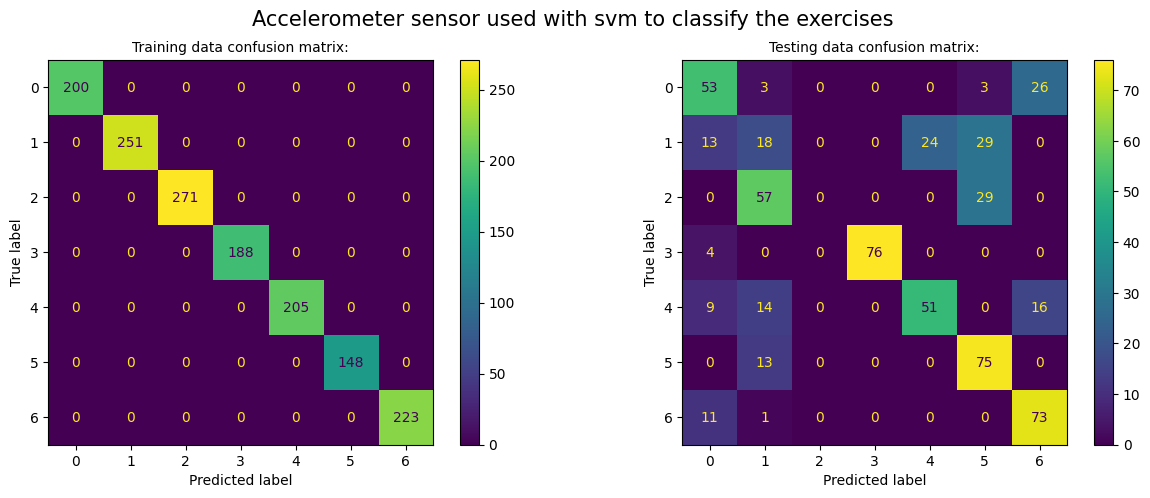

In [21]:
# Visualisation Accelerometer with svm:
visualize(act_svm_pred_train,act_train_labels,act_svm_pred_test,act_test_labels,main_title="Accelerometer sensor used with svm to classify the exercises")

Accelerometer sensor used with ada boost to classify the exercises
Training data F1 score =  0.7970503593911247
Testing data F1 score =  0.6605517190224371


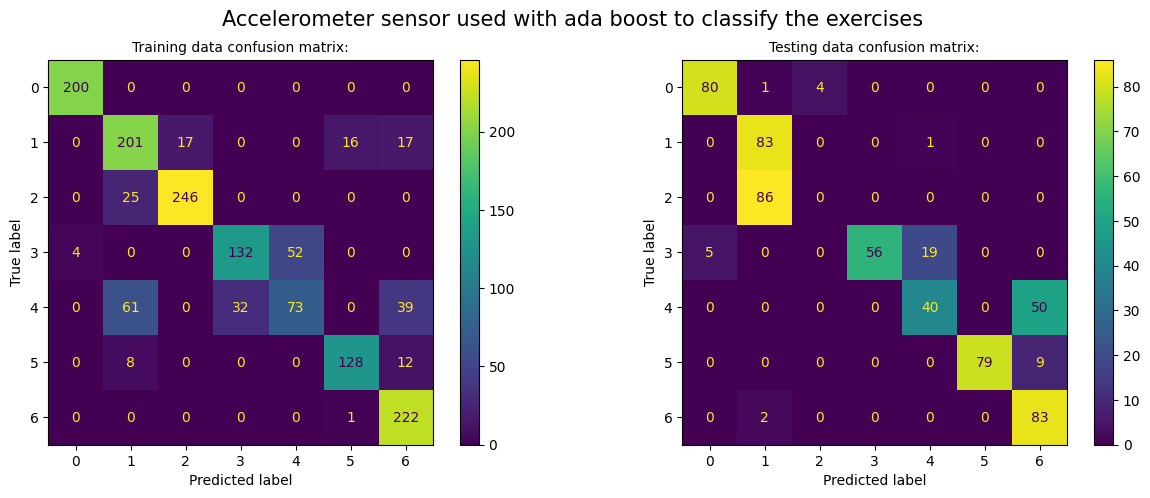

In [22]:
# Visualisation Accelerometer with ada boost:
visualize(act_ada_pred_train,act_train_labels,act_ada_pred_test,act_test_labels,main_title="Accelerometer sensor used with ada boost to classify the exercises")

Depth Camera sensor used with svm to classify the exercises
Training data F1 score =  1.0
Testing data F1 score =  0.36937674931148984


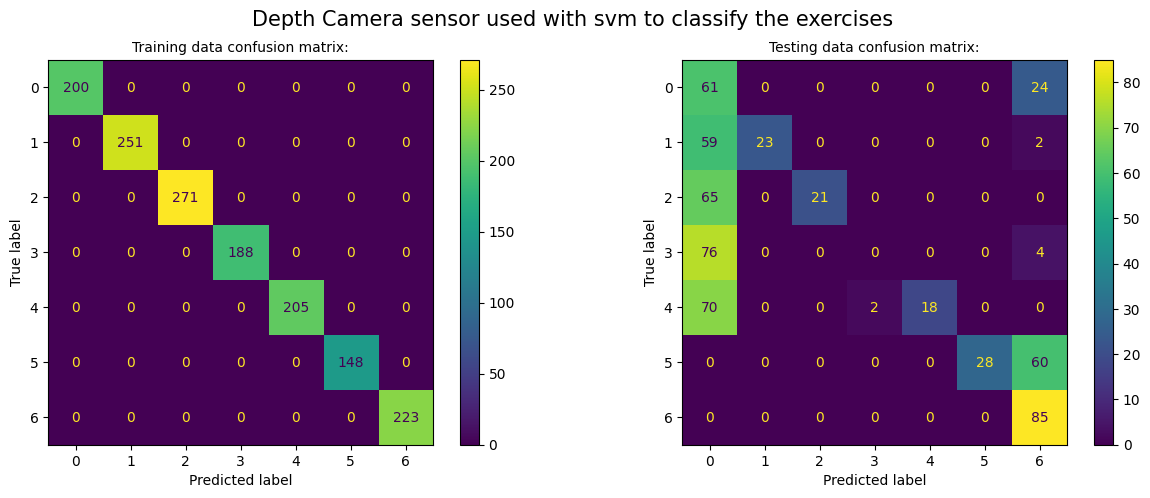

In [23]:
# Visualisation Depth Camera with svm:
visualize(dc_svm_pred_train,dc_train_labels,dc_svm_pred_test,dc_test_labels,main_title="Depth Camera sensor used with svm to classify the exercises")

Depth Camera sensor used with ada boost to classify the exercises
Training data F1 score =  0.726522420096952
Testing data F1 score =  0.33774275345706384


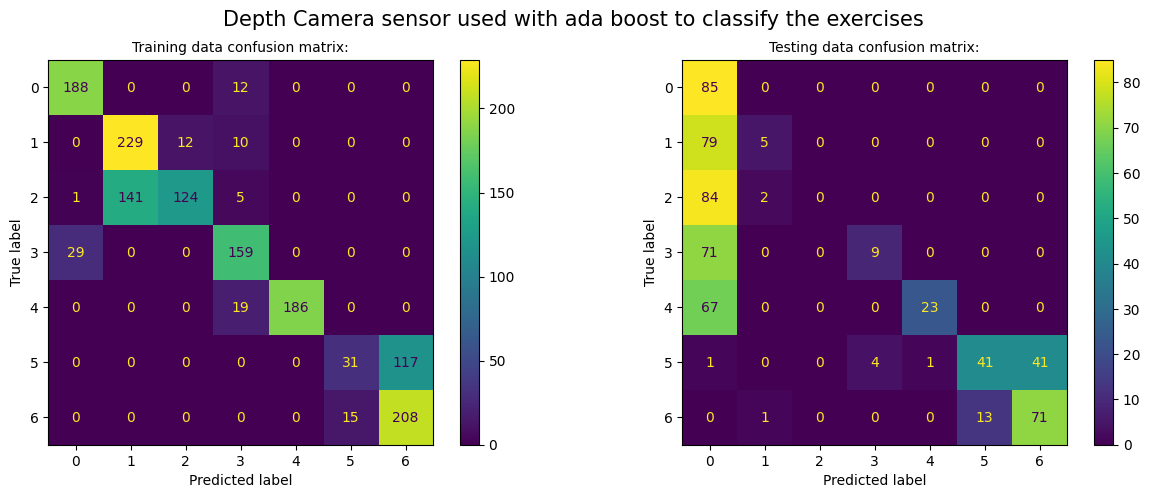

In [24]:
# Visualisation Depth Camera with ada boost:
visualize(dc_ada_pred_train,dc_train_labels,dc_ada_pred_test,dc_test_labels,main_title="Depth Camera sensor used with ada boost to classify the exercises")

#### Discussion
The results are bad
The best results are done

## 4.3 Combine the probabilistic outputs of different modalities by fixed classification rules


#### Combine predictions of different model combinations

In [25]:
start_time = time.time()

ground_truth_train = act_train_labels # They are equal to the dc_train_labels
ground_truth_test = act_test_labels

# Combine predictions SVM-act and SVM-dc
svm2_train, svm2_test = combine_probabilities(act_svm_proba_train,dc_svm_proba_train,
                                              act_svm_proba_test,dc_svm_proba_test)
# Combine predictions SVM-act and Ada-dc
svmad_train, svmad_test = combine_probabilities(act_svm_proba_train,dc_ada_proba_train,
                                              act_svm_proba_test,dc_ada_proba_test)
# Combine predictions Ada-act and Ada-dc
ada2_train, ada2_test = combine_probabilities(act_ada_proba_train,dc_ada_proba_train,
                                              act_ada_proba_test,dc_ada_proba_test)
# Combine predictions Ada-act and SVM-dc
adasv_train, adasv_test = combine_probabilities(act_ada_proba_train,dc_ada_proba_train,
                                              act_ada_proba_test,dc_ada_proba_test)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

Execution Time:  0.012108802795410156


#### Visualize different model combinations with different classification rules

Visualize SVM-act and SVM-dc Results :
SVM-act and SVM-dc with mean rule:
Training data F1 score =  1.0
Testing data F1 score =  0.4362006447750341
SVM-act and SVM-dc with sum rule:
Training data F1 score =  1.0
Testing data F1 score =  0.4362006447750341
SVM-act and SVM-dc with prod rule:
Training data F1 score =  1.0
Testing data F1 score =  0.5221859083900563
SVM-act and SVM-dc with max rule:
Training data F1 score =  1.0
Testing data F1 score =  0.3993055778938594
SVM-act and SVM-dc with min rule:
Training data F1 score =  1.0
Testing data F1 score =  0.5376273084570355


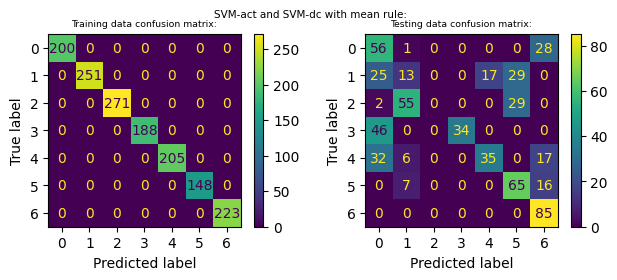

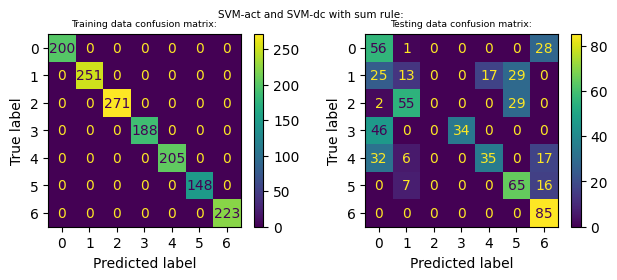

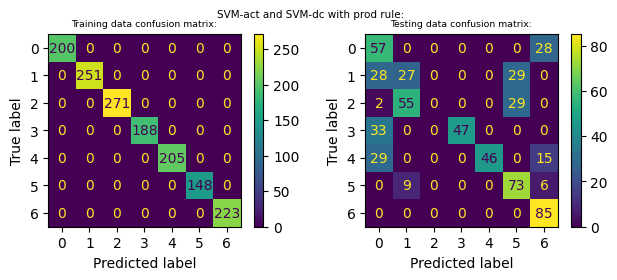

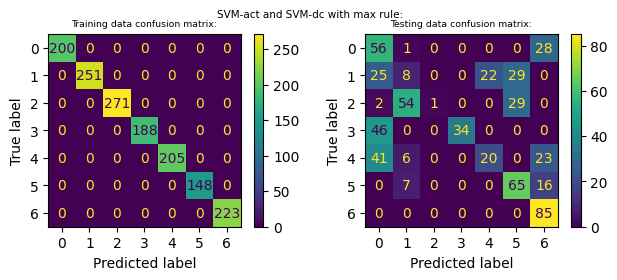

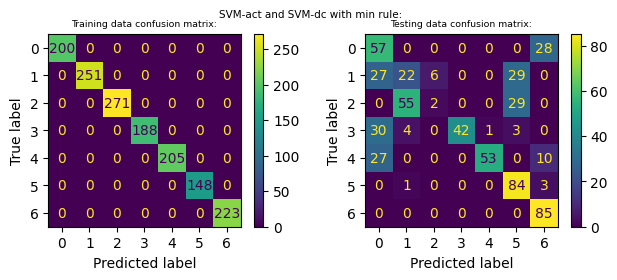

In [26]:
#Visualize
# Combine predictions SVM-act and SVM-dc
combine_visualize(svm2_train,ground_truth_train,svm2_test,ground_truth_test,"SVM-act and SVM-dc")

Visualize SVM-act and Ada-dc Results :
SVM-act and Ada-dc with mean rule:
Training data F1 score =  1.0
Testing data F1 score =  0.5289650755404474
SVM-act and Ada-dc with sum rule:
Training data F1 score =  1.0
Testing data F1 score =  0.5289650755404474
SVM-act and Ada-dc with prod rule:
Training data F1 score =  1.0
Testing data F1 score =  0.6811072379405447
SVM-act and Ada-dc with max rule:
Training data F1 score =  1.0
Testing data F1 score =  0.4981448096504599
SVM-act and Ada-dc with min rule:
Training data F1 score =  1.0
Testing data F1 score =  0.702193488221039


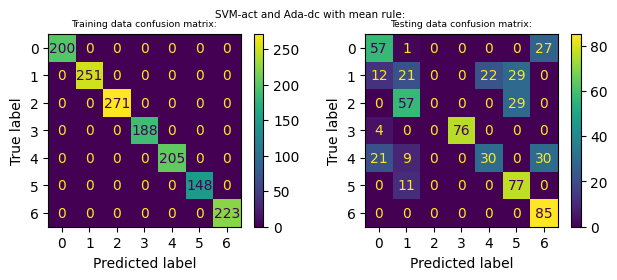

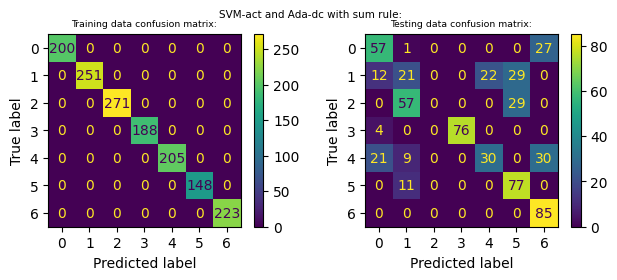

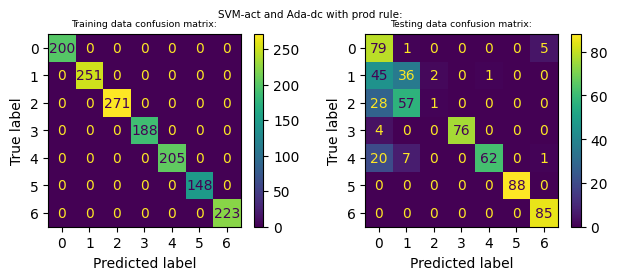

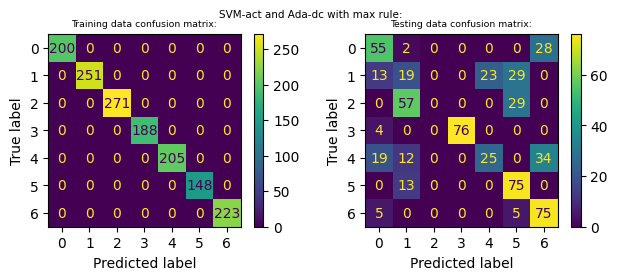

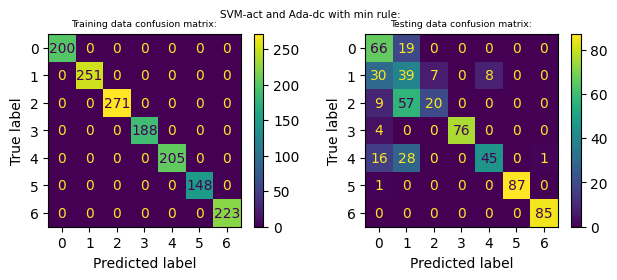

In [27]:
# Combine predictions SVM-act and Ada-dc
combine_visualize(svmad_train,ground_truth_train,svmad_test,ground_truth_test,"SVM-act and Ada-dc")

Visualize Ada-act and Ada-dc Results :
Ada-act and Ada-dc with mean rule:
Training data F1 score =  0.9579079054867864
Testing data F1 score =  0.5738195578481119
Ada-act and Ada-dc with sum rule:
Training data F1 score =  0.9579079054867864
Testing data F1 score =  0.5738195578481119
Ada-act and Ada-dc with prod rule:
Training data F1 score =  0.9634678326169881
Testing data F1 score =  0.5927964163285687
Ada-act and Ada-dc with max rule:
Training data F1 score =  0.8119027673403837
Testing data F1 score =  0.47960017573450875
Ada-act and Ada-dc with min rule:
Training data F1 score =  0.9068439662988591
Testing data F1 score =  0.6291384629925952


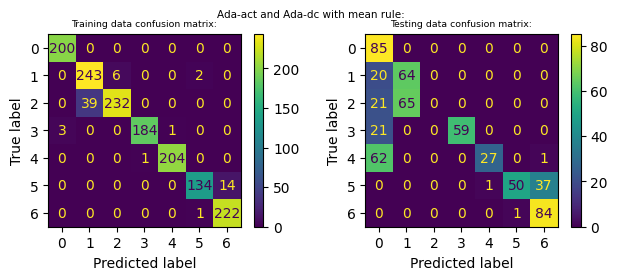

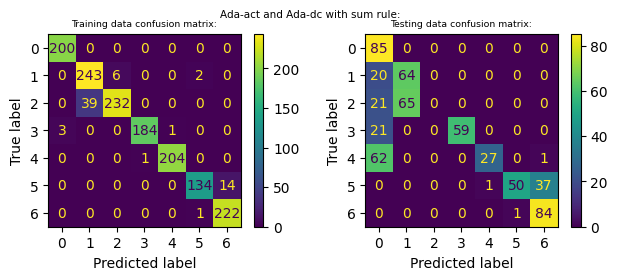

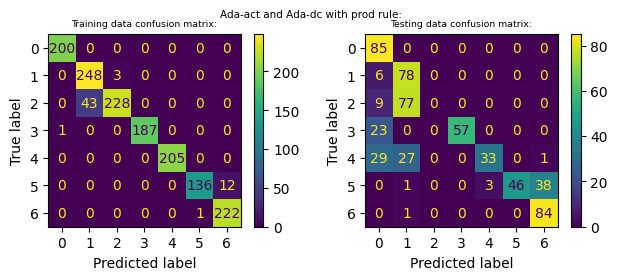

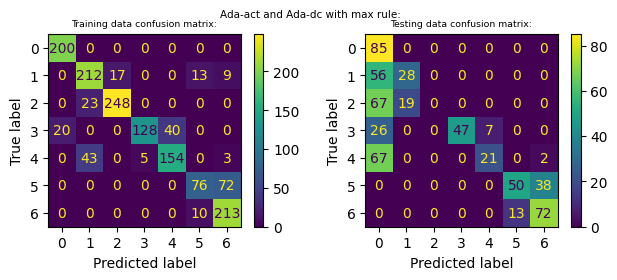

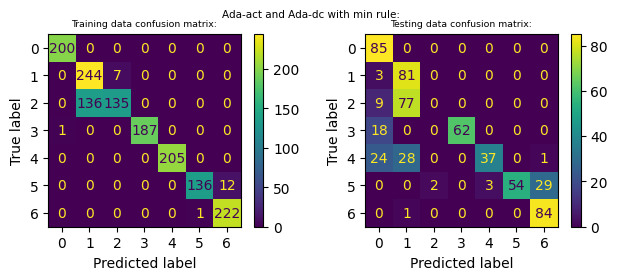

In [28]:
# Combine predictions Ada-act and Ada-dc
combine_visualize(ada2_train,ground_truth_train,ada2_test,ground_truth_test,"Ada-act and Ada-dc")

Visualize Ada-act and SVM-dc Results :
Ada-act and SVM-dc with mean rule:
Training data F1 score =  0.9579079054867864
Testing data F1 score =  0.5738195578481119
Ada-act and SVM-dc with sum rule:
Training data F1 score =  0.9579079054867864
Testing data F1 score =  0.5738195578481119
Ada-act and SVM-dc with prod rule:
Training data F1 score =  0.9634678326169881
Testing data F1 score =  0.5927964163285687
Ada-act and SVM-dc with max rule:
Training data F1 score =  0.8119027673403837
Testing data F1 score =  0.47960017573450875
Ada-act and SVM-dc with min rule:
Training data F1 score =  0.9068439662988591
Testing data F1 score =  0.6291384629925952


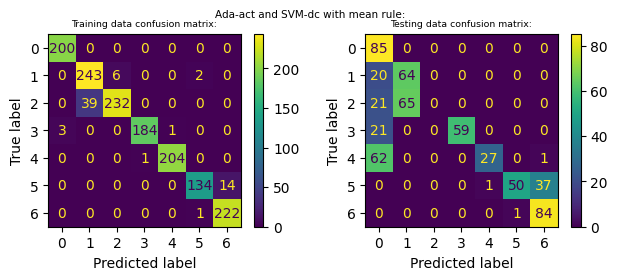

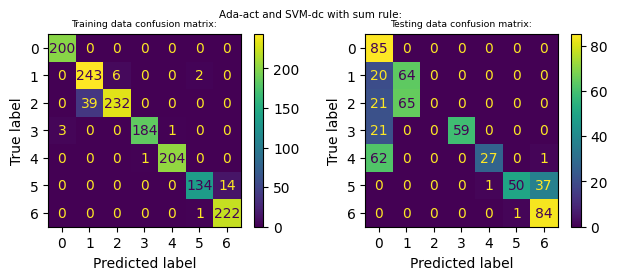

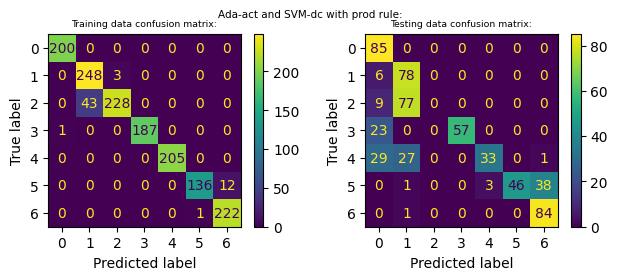

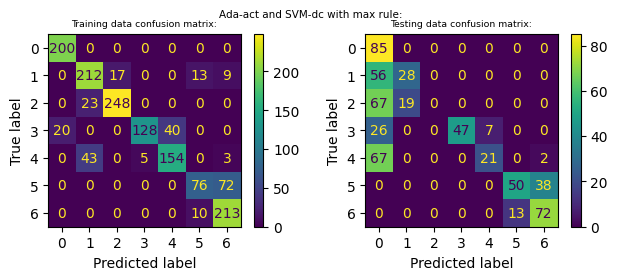

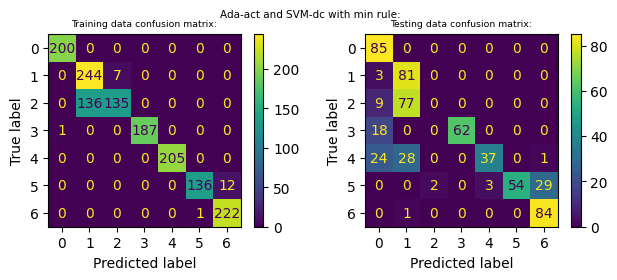

In [29]:
# Combine predictions Ada-act and SVM-dc
combine_visualize(adasv_train,ground_truth_train,adasv_test,ground_truth_test,"Ada-act and SVM-dc")